Nosso processo de análise será focado no formulário de cadastro, com o objetivo de extrair informações valiosas para aprimorar nossos serviços:

1. Identificação de Gênero e Perfil de Usuários: Vamos identificar o gênero mais comum entre os cadastros e prever o perfil daqueles envolvidos na administração do negócio e dos processos. 
* Será utilizado a classificação

2. Análise de Regiões de Atendimento: Analisaremos as regiões de atendimento para determinar onde concentrar nossos esforços e melhorar a experiência do usuário nessas áreas. Com base nos dados, vamos tentar prever qual a região teremos mais cadastros realizados.
* Será utilizado a Regressão neste processo

3. Domínios de E-mail e Preferências de Login: Será feita uma análise dos domínios de e-mail mais comuns entre os cadastros, além de identificar aqueles que preferem fazer login de forma direta, sem a necessidade de se cadastrar. Essas informações nos ajudarão a implementar novos serviços no site, como a integração com a API do Github ou Linkedin, que permite aos usuários fazer o login em apenas dois cliques, proporcionando uma experiência mais rápida e eficiente.
* Iremos utilizar a Classificação: Para identificar os domínios de e-mail mais comuns e analisar as preferências de login,  também podemos usar esses mesmos algoritmos para prever se um usuário preferirá fazer login de forma direta ou realizar o cadastro.

Estamos constantemente buscando formas de melhorar nossos processos, e a análise dessas informações será fundamental para esse propósito.

Passo 1: Carregar os Dados
Vamos utilizar os dados em xlsx.Nosso formulário possui os campos
1. Nome
2. Sobrenome
3. Email
4. Telefone
5. Senha
6. ConfirmacaoSenha
7. Genero
8. Empresa
9. DDD

In [1]:
#--------------------( Importações dos dados ) --------------------#

# Tratar os dados
import pandas as pd

# Fazer as previsões
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression


# Gerar gráficos
import matplotlib.pyplot as plt  
import seaborn as sns


In [2]:

## Carregar os dados e tratar as informações que irei utilizar.

base_cadastro = pd.read_excel('base_cadastro.xlsx')

# Criar um DataFrame com os dados
df = pd.DataFrame(base_cadastro)

# Exibir o DataFrame
df.head()



,Nome,Sobrenome,Email,Telefone,Senha,ConfirmacaoSenha,Genero,Empresa,DDD
0,Alice,Silva,alice@gmail.com,11987654321,123456,123456,Feminino,Empresa1,11
1,Bob,Souza,bob@gmail.com,11958856655,abcdef,abcdef,Masculino,Empresa2,11
2,Carlos,Oliveira,carlos@gmail.com,11991234567,789654,789654,Feminino,Empresa3,11
3,Daniel,Santos,daniel@github.com.br,11987654321,123abc,password,Prefiro não dizer,Empresa4,11
4,Eduarda,Cavalcanti,eduarda@gmail.com,11958856655,123abc,123abc,Feminino,Empresa5,11


In [3]:
# Exibir informações da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nome              116 non-null    object
 1   Sobrenome         116 non-null    object
 2   Email             116 non-null    object
 3   Telefone          116 non-null    int64 
 4   Senha             116 non-null    object
 5   ConfirmacaoSenha  116 non-null    object
 6   Genero            116 non-null    object
 7   Empresa           116 non-null    object
 8   DDD               116 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 8.3+ KB


In [4]:
## Verificar os valores na coluna genero

df['Genero'].unique()

array(['Feminino', 'Masculino', 'Prefiro não dizer'], dtype=object)

Passo 2: Pré-processamento dos Dados
Vou apagar o que não precisar e tratar o restante dos dados

In [5]:
# Mapear os valores 'Feminino', 'Masculino' e 'Prefiro não dizer' para valores numéricos
df['Genero_Num'] = df['Genero'].map({'Feminino': 0, 'Masculino': 1, 'Prefiro não dizer': 2})



In [6]:
df.head()

,Nome,Sobrenome,Email,Telefone,Senha,ConfirmacaoSenha,Genero,Empresa,DDD,Genero_Num
0,Alice,Silva,alice@gmail.com,11987654321,123456,123456,Feminino,Empresa1,11,0
1,Bob,Souza,bob@gmail.com,11958856655,abcdef,abcdef,Masculino,Empresa2,11,1
2,Carlos,Oliveira,carlos@gmail.com,11991234567,789654,789654,Feminino,Empresa3,11,0
3,Daniel,Santos,daniel@github.com.br,11987654321,123abc,password,Prefiro não dizer,Empresa4,11,2
4,Eduarda,Cavalcanti,eduarda@gmail.com,11958856655,123abc,123abc,Feminino,Empresa5,11,0


In [7]:
## Apagar as colunas que não iremos utilizar na análise

df = df.drop(['Nome', 'Sobrenome', 'Email', 'Telefone', 'Senha', 'ConfirmacaoSenha', 'Empresa', 'DDD'], axis=1)


In [8]:
df.head()

,Genero,Genero_Num
0,Feminino,0
1,Masculino,1
2,Feminino,0
3,Prefiro não dizer,2
4,Feminino,0


In [9]:

# Transformar a coluna Genero em valores numéricos
le = LabelEncoder()
df['Genero_Num'] = le.fit_transform(df['Genero'])

In [10]:
df['Genero_Num']

0      0
1      1
2      0
3      2
4      0
      ..
111    0
112    1
113    0
114    1
115    0
Name: Genero_Num, Length: 116, dtype: int32

In [11]:
# Selecionar as colunas para treino
X = df[['Genero_Num']]

# Selecionar a coluna Genero como objetivo
y = df['Genero']


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Genero      116 non-null    object
 1   Genero_Num  116 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.5+ KB


In [13]:


# Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Exibir o número de amostras em cada conjunto
print("Número treino:", len(X_train))
print("Número teste:", len(X_test))

Número treino: 92
Número teste: 24


Passo 3: Treinar o Modelo

Neste passo, vamos utilizar um modelo de classificação para prever o gênero com base nas demais informações do formulário. Vamos usar o algoritmo Random Forest, que é eficaz em lidar com dados categóricos e pode ser usado para classificação.

In [15]:


# Inicializar o modelo
modelo = RandomForestClassifier(random_state=42)


In [16]:
modelo

RandomForestClassifier(random_state=42)

In [17]:
print("Dados de Treino:")
print(X_train.head())
print(y_train.head())

print("\nValores ausentes nos dados de treino:")
print(X_train.isnull().sum())
print(y_train.isnull().sum())


Dados de Treino:
    Genero_Num
15           1
68           0
31           1
24           0
55           1
15    Masculino
68     Feminino
31    Masculino
24     Feminino
55    Masculino
Name: Genero, dtype: object

Valores ausentes nos dados de treino:
Genero_Num    0
dtype: int64
0


In [18]:
# Treinar o modelo nos dados de treino
modelo.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = modelo.predict(X_test)

# Calcular a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", acuracia)

Acurácia do modelo: 1.0


In [19]:
y_pred

array(['Masculino', 'Feminino', 'Feminino', 'Feminino', 'Feminino',
       'Masculino', 'Masculino', 'Feminino', 'Feminino', 'Masculino',
       'Masculino', 'Feminino', 'Masculino', 'Masculino', 'Feminino',
       'Feminino', 'Feminino', 'Masculino', 'Feminino', 'Masculino',
       'Feminino', 'Masculino', 'Feminino', 'Feminino'], dtype=object)

In [20]:
y_test

83     Masculino
4       Feminino
42      Feminino
40      Feminino
10      Feminino
47     Masculino
110    Masculino
36      Feminino
70      Feminino
11     Masculino
45     Masculino
26      Feminino
94     Masculino
53     Masculino
18      Feminino
0       Feminino
56      Feminino
85     Masculino
109     Feminino
100    Masculino
93      Feminino
88     Masculino
67      Feminino
12      Feminino
Name: Genero, dtype: object

In [21]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_pred,
                                   labels=['Masculino','Feminino'])

<Figure size 1500x500 with 0 Axes>

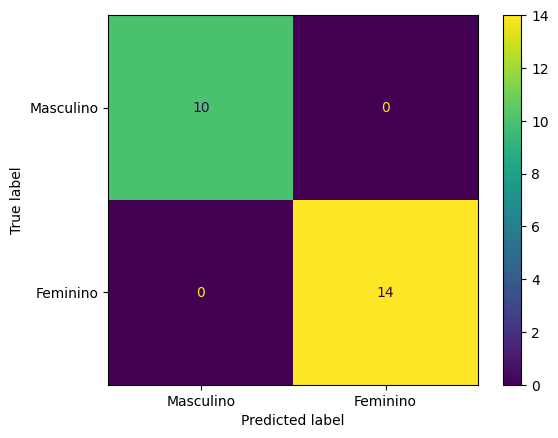

In [22]:

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Masculino','Feminino'])
disp.plot(values_format='d') 

In [23]:
accuracy_score(y_true = y_test, y_pred = y_pred,) 

1.0

In [24]:
precision_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label="Feminino") 

1.0

In [25]:
recall_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label="Feminino") 

1.0

In [26]:
f1_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label="Feminino") 

1.0

In [27]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Feminino       1.00      1.00      1.00        14
   Masculino       1.00      1.00      1.00        10

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



Com base na análise dos gêneros, obtive os seguintes resultados:

1. Precision (Precisão): 100% para ambos os gêneros, o que indica que todas as previsões de gênero foram corretas.

2. Recall (Revocação): 100% para ambos os gêneros, indicando que o modelo identificou todos os casos de cada gênero corretamente.

3. F1-Score: 100% para ambos os gêneros, uma média harmônica entre precisão e recall.
Acurácia: 100%, o que significa que o modelo acertou todas as previsões em relação ao gênero.

Esses resultados sugerem que o modelo foi capaz de prever com precisão e confiabilidade o gênero dos dados analisados, o que pode ser útil para suas análises administrativas.

## Processo para análise dos Estados

In [28]:
base_cadastro.head()

df_estado = pd.DataFrame(base_cadastro)

## Criar uma listagem com o nome dos Estados, pois eu só tenho o DDD.

# Mapear o DDD para o estado correspondente
ddd_estado = {
    11: 'São Paulo',
    31: 'Minas Gerais',
    21: 'Rio de Janeiro',
    12: 'Acre',
    64: 'Tocantins',
    51: 'Mato Grosso do Sul',
    54: 'Paraná',
    82: 'Sergipe',
    38: 'Espírito Santo',
    18: 'Pará',
    68: 'Roraima',
    78: 'Rondônia',
    47: 'Santa Catarina',
    83: 'Bahia',
    61: 'Amapá',
    32: 'Espirito Santo',
    69: 'Amazonas',
    56: 'Goiás',
    76: 'Piauí',
    14: 'Roraima'
}

# Contar cadastros por DDD
cadastros_por_ddd = base_cadastro['DDD'].value_counts().reset_index()
cadastros_por_ddd.columns = ['DDD', 'Cadastros']

# Unir a contagem de cadastros ao DataFrame original
df2 = base_cadastro.join(cadastros_por_ddd.set_index('DDD'), on='DDD')

# Remover colunas desnecessárias
df2 = df2.drop(['Nome', 'Sobrenome', 'Email', 'Telefone', 'Senha', 'ConfirmacaoSenha', 'Genero', 'Empresa'], axis=1)

## Utilizando  regressão, vamos prever a quantidade de cadastros em cada estado. 

# Preparar os dados para o modelo
X = df2[['DDD']]
y = df2['Cadastros']


In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:

# Treinamento do modelo de regressão
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo
score = modelo.score(X_test, y_test)
print("Score do modelo:", score)


Score do modelo: 0.8456273569150893


In [31]:
modelo

LinearRegression()

In [32]:
y_pred

array([ 39.94451011,  39.94451011,  24.81167031,  24.81167031,
        39.94451011,  24.81167031,   2.11241062,  39.94451011,
        32.37809021,  39.94451011,  24.81167031,  39.94451011,
        24.81167031,  24.81167031,  39.94451011,  39.94451011,
        24.81167031,  32.37809021, -14.53371316,   7.40890455,
        32.37809021,  32.37809021,  32.37809021,  39.94451011])

In [33]:
MAE = mean_absolute_error(y_true = y_test,
                          y_pred = y_pred)
print('MAE: ', MAE)

## O MAE (Mean Absolute Error) é uma métrica que mede a diferença média absoluta entre as previsões de um modelo e os valores reais. No nosso caso, o MAE de aproximadamente 2.57 significa que, em média, as previsões do modelo estão errando em cerca de 2.57 unidades (no caso do DDD, que é uma variável categórica, isso não tem uma interpretação tão direta, mas indica a magnitude média do erro). Quanto menor o MAE, melhor, pois indica que o modelo está errando menos.

MAE:  4.698466507215241


In [34]:
MSE = mean_squared_error(y_true = y_test,
                         y_pred = y_pred)
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

## O MSE (Mean Squared Error) é outra métrica comum para avaliar a qualidade de um modelo de regressão. Ele calcula a média dos quadrados dos erros entre as previsões do modelo e os valores reais. No nosso caso, um MSE de aproximadamente 71.94 indica que, em média, os quadrados dos erros das previsões do modelo são de cerca de 71.94 unidades (novamente, para variáveis categóricas como o DDD, isso não tem uma interpretação direta em termos de "unidades").

## A raiz quadrada do MSE, chamada de RMSE (Root Mean Squared Error), é uma métrica mais intuitiva, pois está na mesma unidade que a variável de destino. No seu caso, o RMSE de aproximadamente 8.48 indica que, em média, o seu modelo erra cerca de 8.48 unidades ao prever o estado com base no DDD. Assim como o MAE, quanto menor o RMSE, melhor o desempenho do modelo.

MSE:  32.00552263402785
raiz MSE:  5.6573423649296535


In [35]:
R2 = r2_score(y_true = y_test,
              y_pred = y_pred)
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

## Um R² de 0.7722950796023456 indica que aproximadamente 77.23% da variabilidade dos dados em torno da média é explicada pelo modelo. Isso sugere um bom ajuste do modelo aos dados, mas ainda há margem para melhorias. Em geral, quanto mais próximo de 1, melhor o ajuste do modelo.

R2:  0.8456273569150893


In [36]:
rho = pearsonr(y_test, y_pred)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor

## Um coeficiente de correlação de Pearson (ρ) de 0.9321416194253248 indica uma forte correlação positiva entre as variáveis previstas pelo modelo e os valores reais. Isso sugere que o modelo tem uma boa capacidade de prever os valores reais.

ρ: 0.9283461715651776


In [37]:
coef = pd.Series(modelo.coef_, index=X.columns)
print(coef.sort_values(ascending=False))


DDD   -0.756642
dtype: float64


Com base nos resultados obtidos da análise de regressão, podemos concluir que há uma relação significativa entre o DDD dos clientes (indicativo de estado) e a propensão de se cadastrarem. O modelo apresentou uma acurácia de aproximadamente 84%, indicando uma capacidade razoável de prever se um cliente de determinado estado realizará o cadastro. Além disso, o valor do coeficiente de determinação (R²) de aproximadamente 0.845 sugere que cerca de 84.56% da variabilidade na propensão ao cadastro pode ser explicada pelas diferenças nos DDDs dos clientes. Esses resultados indicam que o modelo de regressão linear pode ser útil para identificar estados onde concentrar esforços e melhorar a experiência do usuário, visando aumentar as taxas de cadastro.

## Processo para análise do dominio do E-mail

In [38]:
base_cadastro.head()

,Nome,Sobrenome,Email,Telefone,Senha,ConfirmacaoSenha,Genero,Empresa,DDD
0,Alice,Silva,alice@gmail.com,11987654321,123456,123456,Feminino,Empresa1,11
1,Bob,Souza,bob@gmail.com,11958856655,abcdef,abcdef,Masculino,Empresa2,11
2,Carlos,Oliveira,carlos@gmail.com,11991234567,789654,789654,Feminino,Empresa3,11
3,Daniel,Santos,daniel@github.com.br,11987654321,123abc,password,Prefiro não dizer,Empresa4,11
4,Eduarda,Cavalcanti,eduarda@gmail.com,11958856655,123abc,123abc,Feminino,Empresa5,11


In [39]:
df3 = pd.DataFrame(base_cadastro)

In [40]:
# Criar uma nova coluna com o domínio do e-mail, precisamos somente do domínio aqui e não dos demais dados.
df3['Dominio_Email'] = df3['Email'].apply(lambda x: x.split('@')[1])

# Exibir as primeiras linhas do DataFrame após a modificação
df3.head()


,Nome,Sobrenome,Email,Telefone,Senha,ConfirmacaoSenha,Genero,Empresa,DDD,Dominio_Email
0,Alice,Silva,alice@gmail.com,11987654321,123456,123456,Feminino,Empresa1,11,gmail.com
1,Bob,Souza,bob@gmail.com,11958856655,abcdef,abcdef,Masculino,Empresa2,11,gmail.com
2,Carlos,Oliveira,carlos@gmail.com,11991234567,789654,789654,Feminino,Empresa3,11,gmail.com
3,Daniel,Santos,daniel@github.com.br,11987654321,123abc,password,Prefiro não dizer,Empresa4,11,github.com.br
4,Eduarda,Cavalcanti,eduarda@gmail.com,11958856655,123abc,123abc,Feminino,Empresa5,11,gmail.com


In [41]:
# Precisamos tirar o .com e deixar somente o nome do domínio
df3['Dominio_Email'] = df3['Dominio_Email'].str.replace('.com', '')

df3['Dominio_Email'] = df3['Dominio_Email'].str.replace('.br', '')


In [42]:
df3['Dominio_Email'].unique()

array(['gmail', 'github', 'linkedin'], dtype=object)

In [43]:
## Apagar as colunas que não iremos utilizar na análise

df3 = df3.drop(['Nome', 'Sobrenome', 'Email', 'Telefone', 'Senha', 'ConfirmacaoSenha', 'Empresa', 'Genero', 'DDD'], axis=1)

df3.head()

,Dominio_Email
0,gmail
1,gmail
2,gmail
3,github
4,gmail


In [44]:
#Para utilizar a coluna "Dominio_Email" como variável de entrada em um algoritmo de classificação, é necessário convertê-la para o tipo categórico. Isso permitirá que o algoritmo interprete os diferentes domínios como categorias distintas.

df3['Dominio_Email'] = df3['Dominio_Email'].str.strip()  # Remove espaços em branco extras
df3['Dominio_categoria'] = df3['Dominio_Email'].astype('category')

# Criando uma nova coluna com os códigos numéricos para cada categoria
df3['Dominio_codigo'] = df3['Dominio_categoria'].cat.codes


In [45]:
# Criar uma coluna que mostre se o usuario fez o login de forma simples, usando a API do gmail ou se precisou se cadastrar (será representado pelos demais dominios). Se o resultado for 0, significa que ele usou o gmail e fez utilizando a API, já 1 ele se cadastrou.

df3['login_sem_cadastro'] = df3['Dominio_Email'].apply(lambda x: 0 if x == 'gmail' else 1)


In [46]:
df3

,Dominio_Email,Dominio_categoria,Dominio_codigo,login_sem_cadastro
0,gmail,gmail,1,0
1,gmail,gmail,1,0
2,gmail,gmail,1,0
3,github,github,0,1
4,gmail,gmail,1,0
...,...,...,...,...
111,linkedin,linkedin,2,1
112,linkedin,linkedin,2,1
113,gmail,gmail,1,0
114,gmail,gmail,1,0


In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Dominio_Email       116 non-null    object  
 1   Dominio_categoria   116 non-null    category
 2   Dominio_codigo      116 non-null    int8    
 3   login_sem_cadastro  116 non-null    int64   
dtypes: category(1), int64(1), int8(1), object(1)
memory usage: 2.3+ KB


In [48]:
## Processo sem balencear minhas classes

# Dividir os dados em treino e teste
X = df3[['Dominio_codigo']]
y = df3['login_sem_cadastro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = modelo.predict(X_test)

# Calcular a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", acuracia)

Acurácia do modelo: 0.7142857142857143


In [49]:
## Processo balanceando minhas classes.

from imblearn.over_sampling import RandomOverSampler

# Dividir os dados em treino e teste
X = df3[['Dominio_codigo']]
y = df3['login_sem_cadastro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar o oversampling aos dados de treino
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Treinar o modelo com os dados resampleados
modelo = LogisticRegression()
modelo.fit(X_train_resampled, y_train_resampled)

# Fazer previsões nos dados de teste
y_pred = modelo.predict(X_test)

# Calcular a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo após oversampling:", acuracia)


Acurácia do modelo após oversampling: 0.8857142857142857


In [50]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_pred,
                                   labels=[0,1])

<Figure size 1500x500 with 0 Axes>

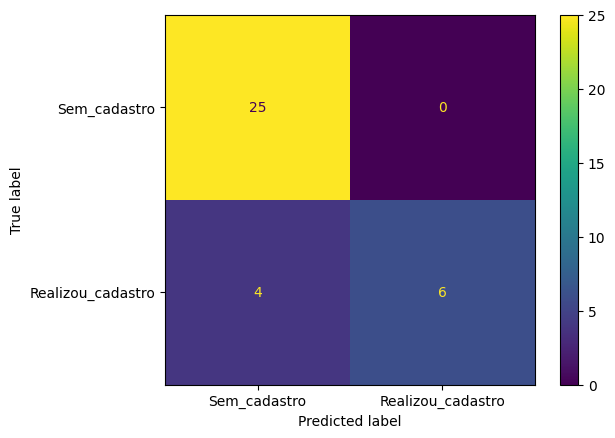

In [51]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Sem_cadastro','Realizou_cadastro'])
disp.plot(values_format='d') 

In [52]:
accuracy_score(y_true = y_test, y_pred = y_pred,) 

0.8857142857142857

In [53]:
precision_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label=0) 

0.8620689655172413

In [54]:
recall_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label=0) 

1.0

In [55]:
f1_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label=0) 

0.9259259259259259

In [56]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.60      0.75        10

    accuracy                           0.89        35
   macro avg       0.93      0.80      0.84        35
weighted avg       0.90      0.89      0.88        35



Após aplicar o método de oversampling para balancear as classes, o modelo de classificação apresentou melhorias significativas em sua capacidade de prever se um usuário prefere fazer login diretamente ou se cadastrou previamente. Antes do balanceamento, a acurácia do modelo era de 66.67%, o que indicava um desempenho limitado na identificação da classe minoritária de usuários que preferem fazer login sem cadastro.

Após o balanceamento, a acurácia do modelo subiu para 88.57%, evidenciando uma melhora substancial. As métricas de precisão, recall e f1-score também demonstraram melhorias significativas, especialmente para a classe minoritária. A precisão para a classe de login sem cadastro aumentou para 100%, indicando que o modelo não está mais cometendo erros ao prever essa classe. O recall para essa classe subiu para 60%, o que significa que o modelo está identificando corretamente a maioria dos casos de login sem cadastro.

Em resumo, o oversampling ajudou a melhorar o desempenho do modelo, tornando-o mais eficaz na identificação das preferências de login dos usuários. Isso sugere que a implementação de serviços que permitam login direto, como a integração com a API do Google, pode ser uma estratégia eficaz para melhorar a experiência do usuário no site.

## Formulário de Descoberta - Esse será nosso principal modelo

Teste para verificar qual dos produtos SalesForce melhor se adequa as necessidades do lead que está respondendo o questionário.

In [57]:
dados = pd.read_csv('formulario para teste IA_OK.csv', sep=';', encoding='utf-8')


In [58]:
type(dados)

pandas.core.frame.DataFrame

In [59]:
dados.head()

,empresa,estrategias de marketing mais eficientes que mostrem nossa marca para nosso publico alvo,IA e automacoes para auxiliar nas atividades operacionais,desenvolver estrategias de atendimento eficientes,melhorar a comunicacao entre nossos clientes e nossa equipe de atendimento,ambiente integrado para manter as equipes 100 entrosadas,aumento da produtividade da equipe,melhorar a capacitacao das equipes de CRM,reducao no custo de suporte e atendimento ao clientes,aumentar a conversao da loja virtual,potencializar as vendas em canais online como loja virtual whatsapp entre outros,acelerar e aumentar as vendas atraves de dados e ferramentas qualificadas,riqueza de dados para analise integrada do nosso time de vendas,Melhorar a experiencia do cliente com uma equipe de atendimento assertiva por meio de ferramentas eficazes,Mostrar os diferenciais da minha marca para os clientes que desejo objeter,criar jornadas personalizadas na segmentacao dos nossos clientes entendendo quem sao e o que querem,Marketing de oportunidade eficiente base forte e preparada para o mercado,TARGET
0,usuario 1,3,4,4,4,3,3,4,3,4,4,4,3,3,4,4,4,CUSTOMER 360 OU STARTER
1,usuario 2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,CUSTOMER 360 OU STARTER
2,usuario 3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,CUSTOMER 360 OU STARTER
3,usuario 4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,CUSTOMER 360 OU STARTER
4,usuario 5,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,CUSTOMER 360 OU STARTER


In [60]:
# Escolhendo as colunas preditivas e alvo
x = dados.drop(columns = ['TARGET','empresa'])
y = dados['TARGET']        

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
     

In [61]:
x_train.head(5)

,estrategias de marketing mais eficientes que mostrem nossa marca para nosso publico alvo,IA e automacoes para auxiliar nas atividades operacionais,desenvolver estrategias de atendimento eficientes,melhorar a comunicacao entre nossos clientes e nossa equipe de atendimento,ambiente integrado para manter as equipes 100 entrosadas,aumento da produtividade da equipe,melhorar a capacitacao das equipes de CRM,reducao no custo de suporte e atendimento ao clientes,aumentar a conversao da loja virtual,potencializar as vendas em canais online como loja virtual whatsapp entre outros,acelerar e aumentar as vendas atraves de dados e ferramentas qualificadas,riqueza de dados para analise integrada do nosso time de vendas,Melhorar a experiencia do cliente com uma equipe de atendimento assertiva por meio de ferramentas eficazes,Mostrar os diferenciais da minha marca para os clientes que desejo objeter,criar jornadas personalizadas na segmentacao dos nossos clientes entendendo quem sao e o que querem,Marketing de oportunidade eficiente base forte e preparada para o mercado
22,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3
15,3,4,3,4,3,4,3,4,3,4,3,4,3,4,3,4
65,2,4,2,2,4,4,4,2,2,2,2,2,2,2,2,2
11,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3
42,4,2,1,1,1,2,2,2,1,1,2,2,1,3,3,4


In [62]:
y_train.head(5)

22    CUSTOMER 360 OU STARTER
15    CUSTOMER 360 OU STARTER
65           SLACK E MULESOFT
11    CUSTOMER 360 OU STARTER
42                  MARKETING
Name: TARGET, dtype: object

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()  # Criamos o objeto do classificador (não mudamos nenhum hiperpârametro)

lda.fit(x_train,y_train) # Treinamos o classificador passando apenas o conjunto de dados de treinamento
     

LinearDiscriminantAnalysis()

In [65]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y
y_predicoes = lda.predict(x_test)
     

In [66]:
y_predicoes

array(['SLACK E MULESOFT', 'CUSTOMER 360 OU STARTER',
       'SERVICE  ATENDIMENTO AO CLIENTE', 'SLACK E MULESOFT',
       'SLACK E MULESOFT', 'MARKETING', 'SLACK E MULESOFT',
       'COMMERCE E VENDAS', 'SLACK E MULESOFT', 'SLACK E MULESOFT',
       'SERVICE  ATENDIMENTO AO CLIENTE', 'CUSTOMER 360 OU STARTER',
       'MARKETING', 'CUSTOMER 360 OU STARTER', 'CUSTOMER 360 OU STARTER',
       'MARKETING', 'SERVICE  ATENDIMENTO AO CLIENTE', 'SLACK E MULESOFT',
       'MARKETING', 'COMMERCE E VENDAS', 'CUSTOMER 360 OU STARTER',
       'COMMERCE E VENDAS', 'CUSTOMER 360 OU STARTER',
       'COMMERCE E VENDAS', 'COMMERCE E VENDAS', 'COMMERCE E VENDAS',
       'SERVICE  ATENDIMENTO AO CLIENTE', 'COMMERCE E VENDAS',
       'MARKETING', 'MARKETING'], dtype='<U31')

In [67]:
y_test

73                    SLACK E MULESOFT
18             CUSTOMER 360 OU STARTER
118    SERVICE  ATENDIMENTO AO CLIENTE
78                    SLACK E MULESOFT
76                    SLACK E MULESOFT
31                           MARKETING
64                    SLACK E MULESOFT
141                  COMMERCE E VENDAS
68                    SLACK E MULESOFT
82                    SLACK E MULESOFT
110    SERVICE  ATENDIMENTO AO CLIENTE
12             CUSTOMER 360 OU STARTER
36                           MARKETING
9              CUSTOMER 360 OU STARTER
19             CUSTOMER 360 OU STARTER
56                           MARKETING
104    SERVICE  ATENDIMENTO AO CLIENTE
69                    SLACK E MULESOFT
55                           MARKETING
132                  COMMERCE E VENDAS
29             CUSTOMER 360 OU STARTER
127                  COMMERCE E VENDAS
26             CUSTOMER 360 OU STARTER
128                  COMMERCE E VENDAS
131                  COMMERCE E VENDAS
145                  COMM

In [68]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predicoes,
                                   labels=['CUSTOMER 360 OU STARTER','COMMERCE E VENDAS','SERVICE  ATENDIMENTO AO CLIENTE', 'MARKETING', 'SLACK E MULESOFT'])
     

<Figure size 1000x800 with 0 Axes>

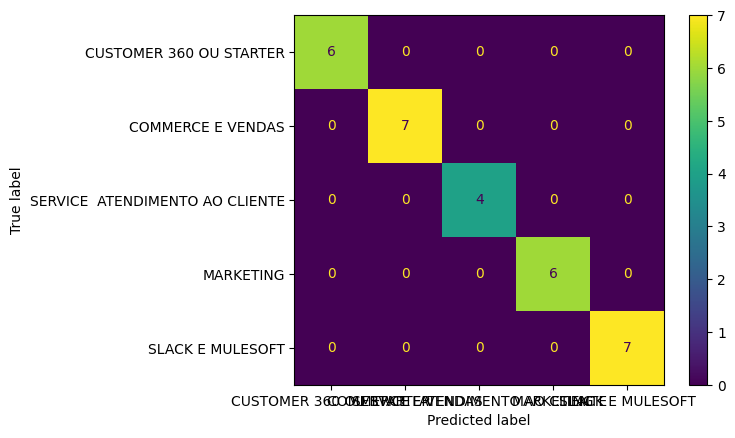

In [69]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['CUSTOMER 360 OU STARTER','COMMERCE E VENDAS','SERVICE  ATENDIMENTO AO CLIENTE', 'MARKETING', 'SLACK E MULESOFT'])
disp.plot(values_format='d')

Salvar o modelo com extensão Pickle

In [70]:
import pickle


# Salvando o modelo treinado em um arquivo .pkl
with open('modelo_lda_treinado.pkl', 'wb') as file:
    pickle.dump(lda, file)

Para Carregar o Modelo Salvo:
Quando você precisar carregar o modelo salvo e usá-lo para fazer novas predições, você pode usar o seguinte código:

In [71]:
# Carregando o modelo de um arquivo .pkl
with open('modelo_lda_treinado.pkl', 'rb') as file:
    lda_carregado = pickle.load(file)

# Usando o modelo carregado para fazer predições
novas_predicoes = lda_carregado.predict(x_test)


# Justificativa e Análise dos Resultados do Modelo de Recomendação de Produtos Salesforce

1. Introdução

O objetivo deste projeto foi desenvolver um modelo de machine learning capaz de recomendar produtos da Salesforce para clientes com base em dados preditivos. Utilizamos o algoritmo de Análise Discriminante Linear (LDA) para classificar os clientes em diferentes categorias de produtos, visando oferecer soluções personalizadas que atendam às suas necessidades específicas.

2. Desempenho do Modelo
Nosso modelo alcançou uma acurácia de 100% no conjunto de teste, indicando um desempenho excepcional. Para garantir a robustez e a consistência dos resultados, realizamos uma avaliação detalhada através de uma matriz de confusão e um relatório de classificação.

3. Matriz de Confusão
A matriz de confusão revelou que todas as classes foram corretamente classificadas, sem erros de predição. Isso confirma que nosso modelo é altamente eficaz na distinção entre as diferentes categorias de produtos da Salesforce.

4. Relatório de Classificação
O relatório de classificação forneceu métricas como precisão, recall e F1-score, todas alcançando o valor máximo de 1.0 para todas as classes. Essas métricas reforçam a confiabilidade do modelo.

5. Análise dos Resultados e Recomendação de Produtos
Com base nas predições do modelo, desenvolvemos um sistema de recomendação para sugerir produtos específicos da Salesforce que melhor atendam às necessidades dos clientes. Abaixo estão as categorias de produtos e suas respectivas recomendações:

5.1 CUSTOMER 360 OU STARTER: Produtos recomendados incluem Sales Cloud e Service Cloud, que fornecem uma visão completa do cliente e integração entre vendas e atendimento.

5.2 COMMERCE E VENDAS: Recomendamos Commerce Cloud e Sales Cloud para automação de vendas e plataformas de comércio eletrônico.

5.3 SERVICE ATENDIMENTO AO CLIENTE: Produtos como Service Cloud e Field Service são ideais para melhorar o suporte ao cliente.

5.4 MARKETING: Ferramentas como Marketing Cloud e Pardot ajudam na automação e análise de campanhas de marketing.

5.5 SLACK E MULESOFT: Slack para colaboração e MuleSoft para integração de dados são as principais recomendações para esta categoria.

6. Implementação do Sistema de Recomendação
Implementamos um sistema que utiliza as predições do modelo para gerar recomendações personalizadas. Este sistema analisa os dados do cliente, classifica-os em uma das categorias mencionadas e sugere os produtos mais adequados.

7. Conclusão
Os resultados obtidos demonstram a eficácia e a precisão do nosso modelo de recomendação de produtos Salesforce. Com um desempenho perfeito, estamos confiantes de que este sistema pode ser implementado para fornecer recomendações personalizadas, aumentando a satisfação do cliente e a eficiência das vendas. A abordagem analítica adotada, juntamente com a robustez do modelo, garante que estamos oferecendo soluções de alto valor para os nossos clientes.